In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [10]:
df["job"].replace({"admin.": "admin"}, inplace=True)


C:\Users\binar\AppData\Local\Temp\ipykernel_16500\1340768125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [11]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [13]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

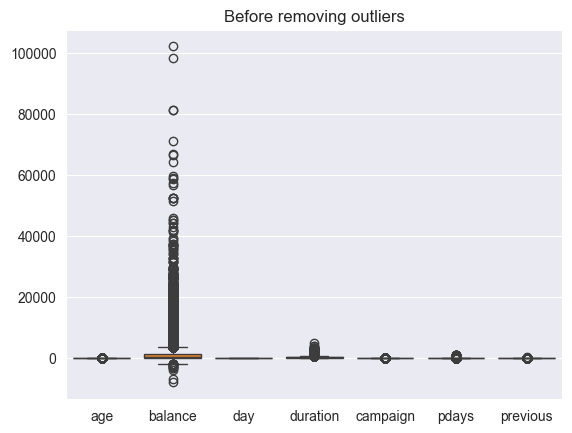

In [14]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df.to_csv("Delimeted_Dataset.csv")

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].str.lower().map(month_mapping)

df['education'] = label_encoder.fit_transform(df['education'])



df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)
df=df.astype(int)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [20]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [21]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [22]:
Pearson_Correlation = df.corr(method='pearson')


for col in Pearson_Correlation.columns:
    for index in Pearson_Correlation.index:
        if Pearson_Correlation.loc[index, col] > 0.9 and index != col:
            print(f"{index} and {col}: {Pearson_Correlation.loc[index, col]}")


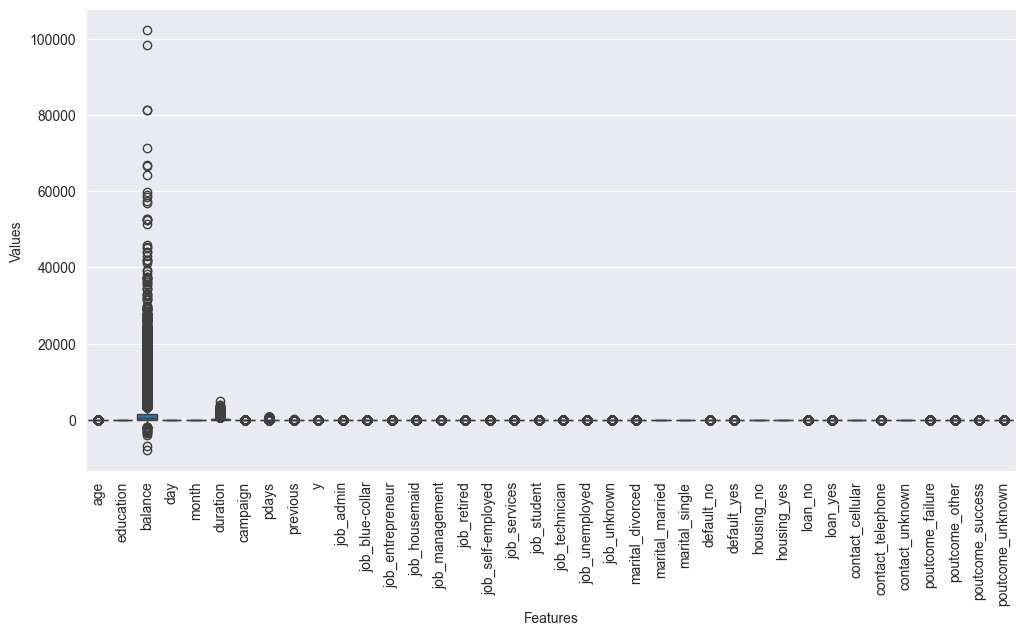

In [23]:
df_melted = df.melt(var_name="Features", value_name="Values")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Features", y="Values")
plt.xticks(rotation=90)
plt.show()

              Feature  Importance
5            duration    0.276914
2             balance    0.102705
0                 age    0.097081
3                 day    0.090229
4               month    0.076677
35   poutcome_success    0.046407
7               pdays    0.042502
6            campaign    0.038788
1           education    0.026588
8            previous    0.021042
27        housing_yes    0.013672
26         housing_no    0.013233
13     job_management    0.010619
18     job_technician    0.010480
22    marital_married    0.009730
30   contact_cellular    0.009584
9           job_admin    0.008737
32    contact_unknown    0.008699
10    job_blue-collar    0.008651
23     marital_single    0.008493
33   poutcome_failure    0.008385
36   poutcome_unknown    0.007017
21   marital_divorced    0.006816
16       job_services    0.006438
28            loan_no    0.006159
29           loan_yes    0.006139
14        job_retired    0.005309
31  contact_telephone    0.004674
17        job_

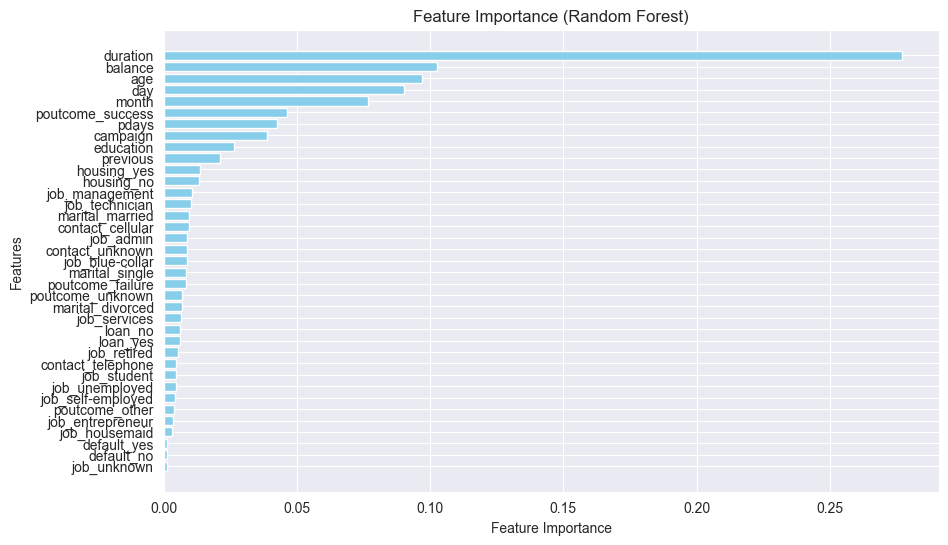

In [53]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

x_train=df.drop(columns=['y'])
y_train=df['y']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Map feature importances to feature names
features = x_train.columns  # Feature names from your dataset
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [56]:


# Example feature importance data
feature_importance = {
    "Feature": [
        "duration", "balance", "age", "day", "month", "poutcome_success",
        "pdays", "campaign", "education", "previous", "housing_yes",
        "housing_no", "job_management", "job_technician", "marital_married",
        "contact_cellular", "job_admin", "contact_unknown", "job_blue-collar",
        "marital_single", "poutcome_failure", "poutcome_unknown",
        "marital_divorced", "job_services", "loan_no", "loan_yes",
        "job_retired", "contact_telephone", "job_student", "job_unemployed",
        "job_self-employed", "poutcome_other", "job_entrepreneur",
        "job_housemaid", "default_yes", "default_no", "job_unknown"
    ],
    "Importance": [
        0.276914, 0.102705, 0.097081, 0.090229, 0.076677, 0.046407, 0.042502,
        0.038788, 0.026588, 0.021042, 0.013672, 0.013233, 0.010619, 0.010480,
        0.009730, 0.009584, 0.008737, 0.008699, 0.008651, 0.008493, 0.008385,
        0.007017, 0.006816, 0.006438, 0.006159, 0.006139, 0.005309, 0.004674,
        0.004627, 0.004496, 0.004489, 0.003932, 0.003666, 0.003356, 0.001236,
        0.001218, 0.001211
    ]
}

# Convert to DataFrame
importance_df = pd.DataFrame(feature_importance)

# Set threshold for low importance
low_importance_threshold = 0.01

# Identify features with low importance
low_importance_features = importance_df[importance_df["Importance"] < low_importance_threshold]["Feature"].tolist()
print("Low Importance Features (Candidates for PCA):", low_importance_features)

# Identify grouped features (e.g., one-hot encoded categories)
grouped_features = [f for f in low_importance_features if f.startswith(("job_", "marital_", "poutcome_", "contact_", "loan_", "default_"))]
print("Grouped Features for PCA:", grouped_features)


Low Importance Features (Candidates for PCA): ['marital_married', 'contact_cellular', 'job_admin', 'contact_unknown', 'job_blue-collar', 'marital_single', 'poutcome_failure', 'poutcome_unknown', 'marital_divorced', 'job_services', 'loan_no', 'loan_yes', 'job_retired', 'contact_telephone', 'job_student', 'job_unemployed', 'job_self-employed', 'poutcome_other', 'job_entrepreneur', 'job_housemaid', 'default_yes', 'default_no', 'job_unknown']
Grouped Features for PCA: ['marital_married', 'contact_cellular', 'job_admin', 'contact_unknown', 'job_blue-collar', 'marital_single', 'poutcome_failure', 'poutcome_unknown', 'marital_divorced', 'job_services', 'loan_no', 'loan_yes', 'job_retired', 'contact_telephone', 'job_student', 'job_unemployed', 'job_self-employed', 'poutcome_other', 'job_entrepreneur', 'job_housemaid', 'default_yes', 'default_no', 'job_unknown']


In [43]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['age','balance', 'duration']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,2,0.092259,5,5,0.053070,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,1,0.073067,5,5,0.030704,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,1,0.072822,5,5,0.015453,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,3,0.086476,5,5,0.018707,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,3,0.072812,5,5,0.040260,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [67]:
from sklearn.decomposition import PCA


X=df[grouped_features]


pca = PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)
pca_columns = X_pca[:, :3]
pca_data = np.concatenate([pca_columns], axis=1)
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2','PCA3'])
pca_df.head()
new_df=pd.concat([df.iloc[:,0:10], pca_df],axis=1)
new_df.head()



Explained Variance Ratio: [0.20708037 0.1809298  0.1236799  0.08804448 0.07900066 0.06733892
 0.04802035 0.04139976 0.03369283 0.0258314  0.02056517 0.01617367
 0.01562754 0.01417154]


,age,education,balance,day,month,duration,campaign,pdays,previous,y,PCA1,PCA2,PCA3
0,0.519481,2,0.092259,5,5,0.053070,1,-1,0,0,-1.033554,0.004631,0.275845
1,0.337662,1,0.073067,5,5,0.030704,1,-1,0,0,-0.469314,-1.252804,0.130295
2,0.194805,1,0.072822,5,5,0.015453,1,-1,0,0,-1.079229,0.174462,-1.133392
3,0.376623,3,0.086476,5,5,0.018707,1,-1,0,0,-1.189341,0.065862,0.285674
4,0.194805,3,0.072812,5,5,0.040260,1,-1,0,0,-0.472373,-1.253150,0.135657


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features and target
X = new_df.drop(["y"], axis=1)
Y = new_df["y"]

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

# Training the Random Forest Classifier on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluating the model on the training set
y_train_pred = rf.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


y_val_pred = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Printing the classification report
print(classification_report(Y_test, y_val_pred))


Training Accuracy: 100.00%
Validation Accuracy: 88.88%
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7952
           1       0.53      0.65      0.59      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.79      0.76      9043
weighted avg       0.90      0.89      0.89      9043



In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='f1_macro')
print("Cross-Validation F1-Scores:", scores)
print("Mean F1-Score:", scores.mean())

Cross-Validation F1-Scores: [0.47320568 0.44745674 0.45886376 0.37463488 0.3566511 ]
Mean F1-Score: 0.422162433956525


1, trainng Loss: 0.3838, val Loss: 0.3333
2, trainng Loss: 0.3260, val Loss: 0.3242
3, trainng Loss: 0.3047, val Loss: 0.3350
4, trainng Loss: 0.2918, val Loss: 0.2839
5, trainng Loss: 0.2793, val Loss: 0.2866
6, trainng Loss: 0.2766, val Loss: 0.2751
7, trainng Loss: 0.2726, val Loss: 0.2763
8, trainng Loss: 0.2707, val Loss: 0.2743
9, trainng Loss: 0.2685, val Loss: 0.2777
10, trainng Loss: 0.2669, val Loss: 0.2797


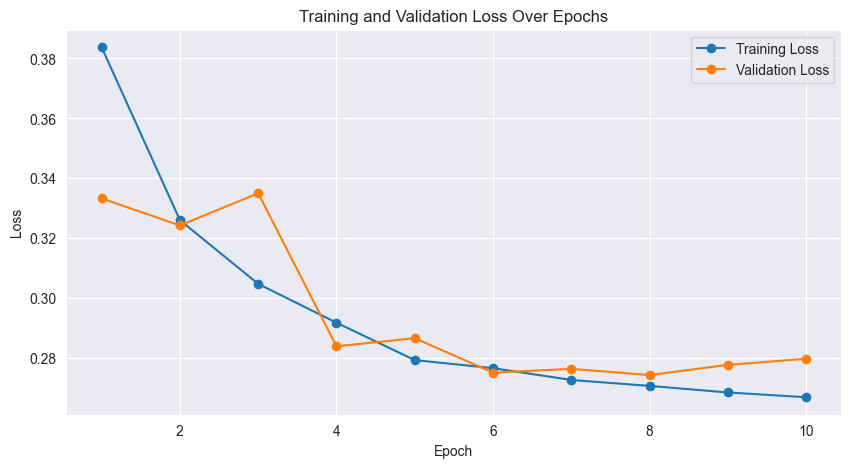

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11948
           1       0.62      0.15      0.24      1616

    accuracy                           0.89     13564
   macro avg       0.76      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [70]:
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch.nn as nn
import torch.optim as optim


input = torch.tensor(new_df.drop(columns=['y']).values, dtype=torch.float32)
target = torch.tensor(new_df['y'].values, dtype=torch.long)


dataset = TensorDataset(input, target)
train_dataset, val_dataset = random_split(dataset, [int(0.7 * len(df)), len(df) - int(0.7 * len(df))])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

input_size = input.shape[1]


model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    training_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    validation_losses.append(val_loss)

    print(f"{epoch + 1}, trainng Loss: {train_loss:.4f}, val Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

y_pred = []
y_val = []
model.eval()
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        y_pred.append(torch.argmax(outputs, dim=1))
        y_val.append(targets)

y_pred = torch.cat(y_pred)
y_val = torch.cat(y_val)

print(classification_report(y_val.numpy(), y_pred.numpy()))
